<a href="https://colab.research.google.com/github/baemmma/mychatbot/blob/master/_Challenge_Sign_MNIST_eb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Challenge - Sign MNIST


In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import string
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [8]:
# Load the data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [39]:
from google.colab import drive
import pandas as pd
import numpy as np

# Monter le lecteur Google Drive
drive.mount('/content/drive')

# Chemins des fichiers CSV
file_path_train = '/content/drive/MyDrive/Colab Notebooks/sign_mnist_train.csv'
file_path_test = '/content/drive/MyDrive/Colab Notebooks/sign_mnist_test.csv'

# Fonction pour importer les données à partir d'un fichier CSV
def import_data(file_path):
    data = pd.read_csv(file_path)
    X = data.drop('label', axis=1).values
    y = data['label'].values
    return X, y

# Importer les données d'entraînement et de test à partir des fichiers CSV
X_train, y_train = import_data(file_path_train)
X_test, y_test = import_data(file_path_test)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
y_test

array([ 6,  5, 10, ...,  2,  4,  2])

In [42]:
for i in range(10,25,1):
  y_train[y_train == i] = i-1
  y_test[y_test == i] = i-1

In [43]:
print('shape of X_train: {} , Shape of X_test : {}' .format(X_train.shape, X_test.shape))
print('Shape of y_train : {}, Shape of y_test : {}' .format(y_train.shape, y_test.shape))

shape of X_train: (27455, 784) , Shape of X_test : (7172, 784)
Shape of y_train : (27455,), Shape of y_test : (7172,)


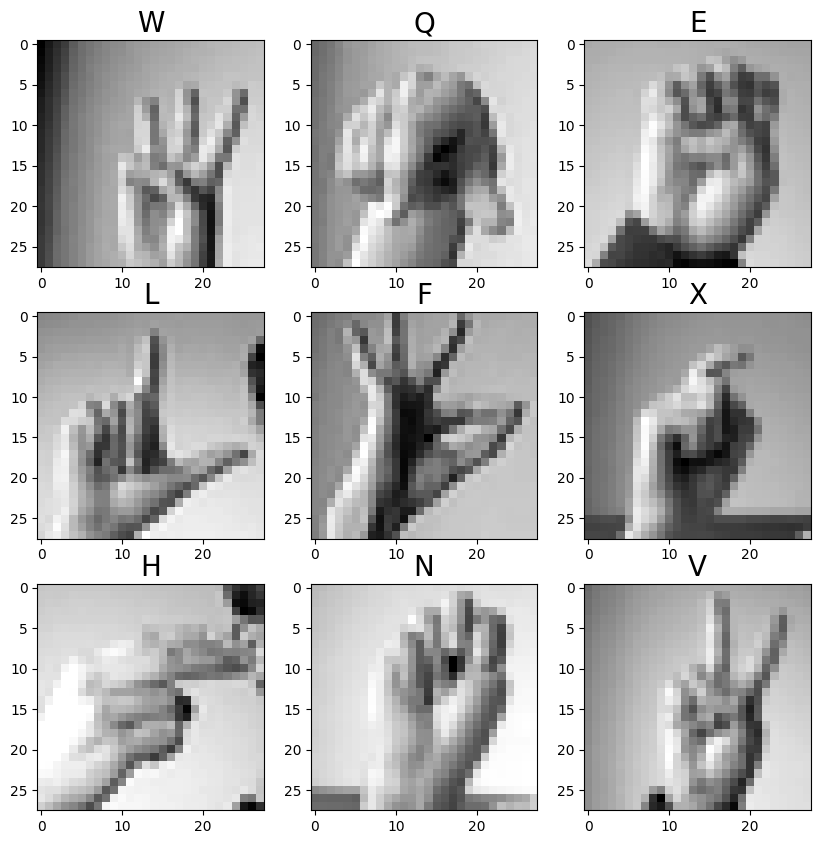

In [47]:
import random
import matplotlib.pyplot as plt

# Dictionary mapping label to letter
num_letters = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F',
    6: 'G', 7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M',
    12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S',
    18: 'T', 19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'
}

plt.figure(figsize=(10, 10))

for i in range(9):
    ind = random.randint(0, X_train.shape[0])
    image = X_train[ind].reshape(28, 28)
    plt.subplot(3, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(num_letters[y_train[ind]], fontdict={'color': 'black', 'fontsize': 20})

plt.show()


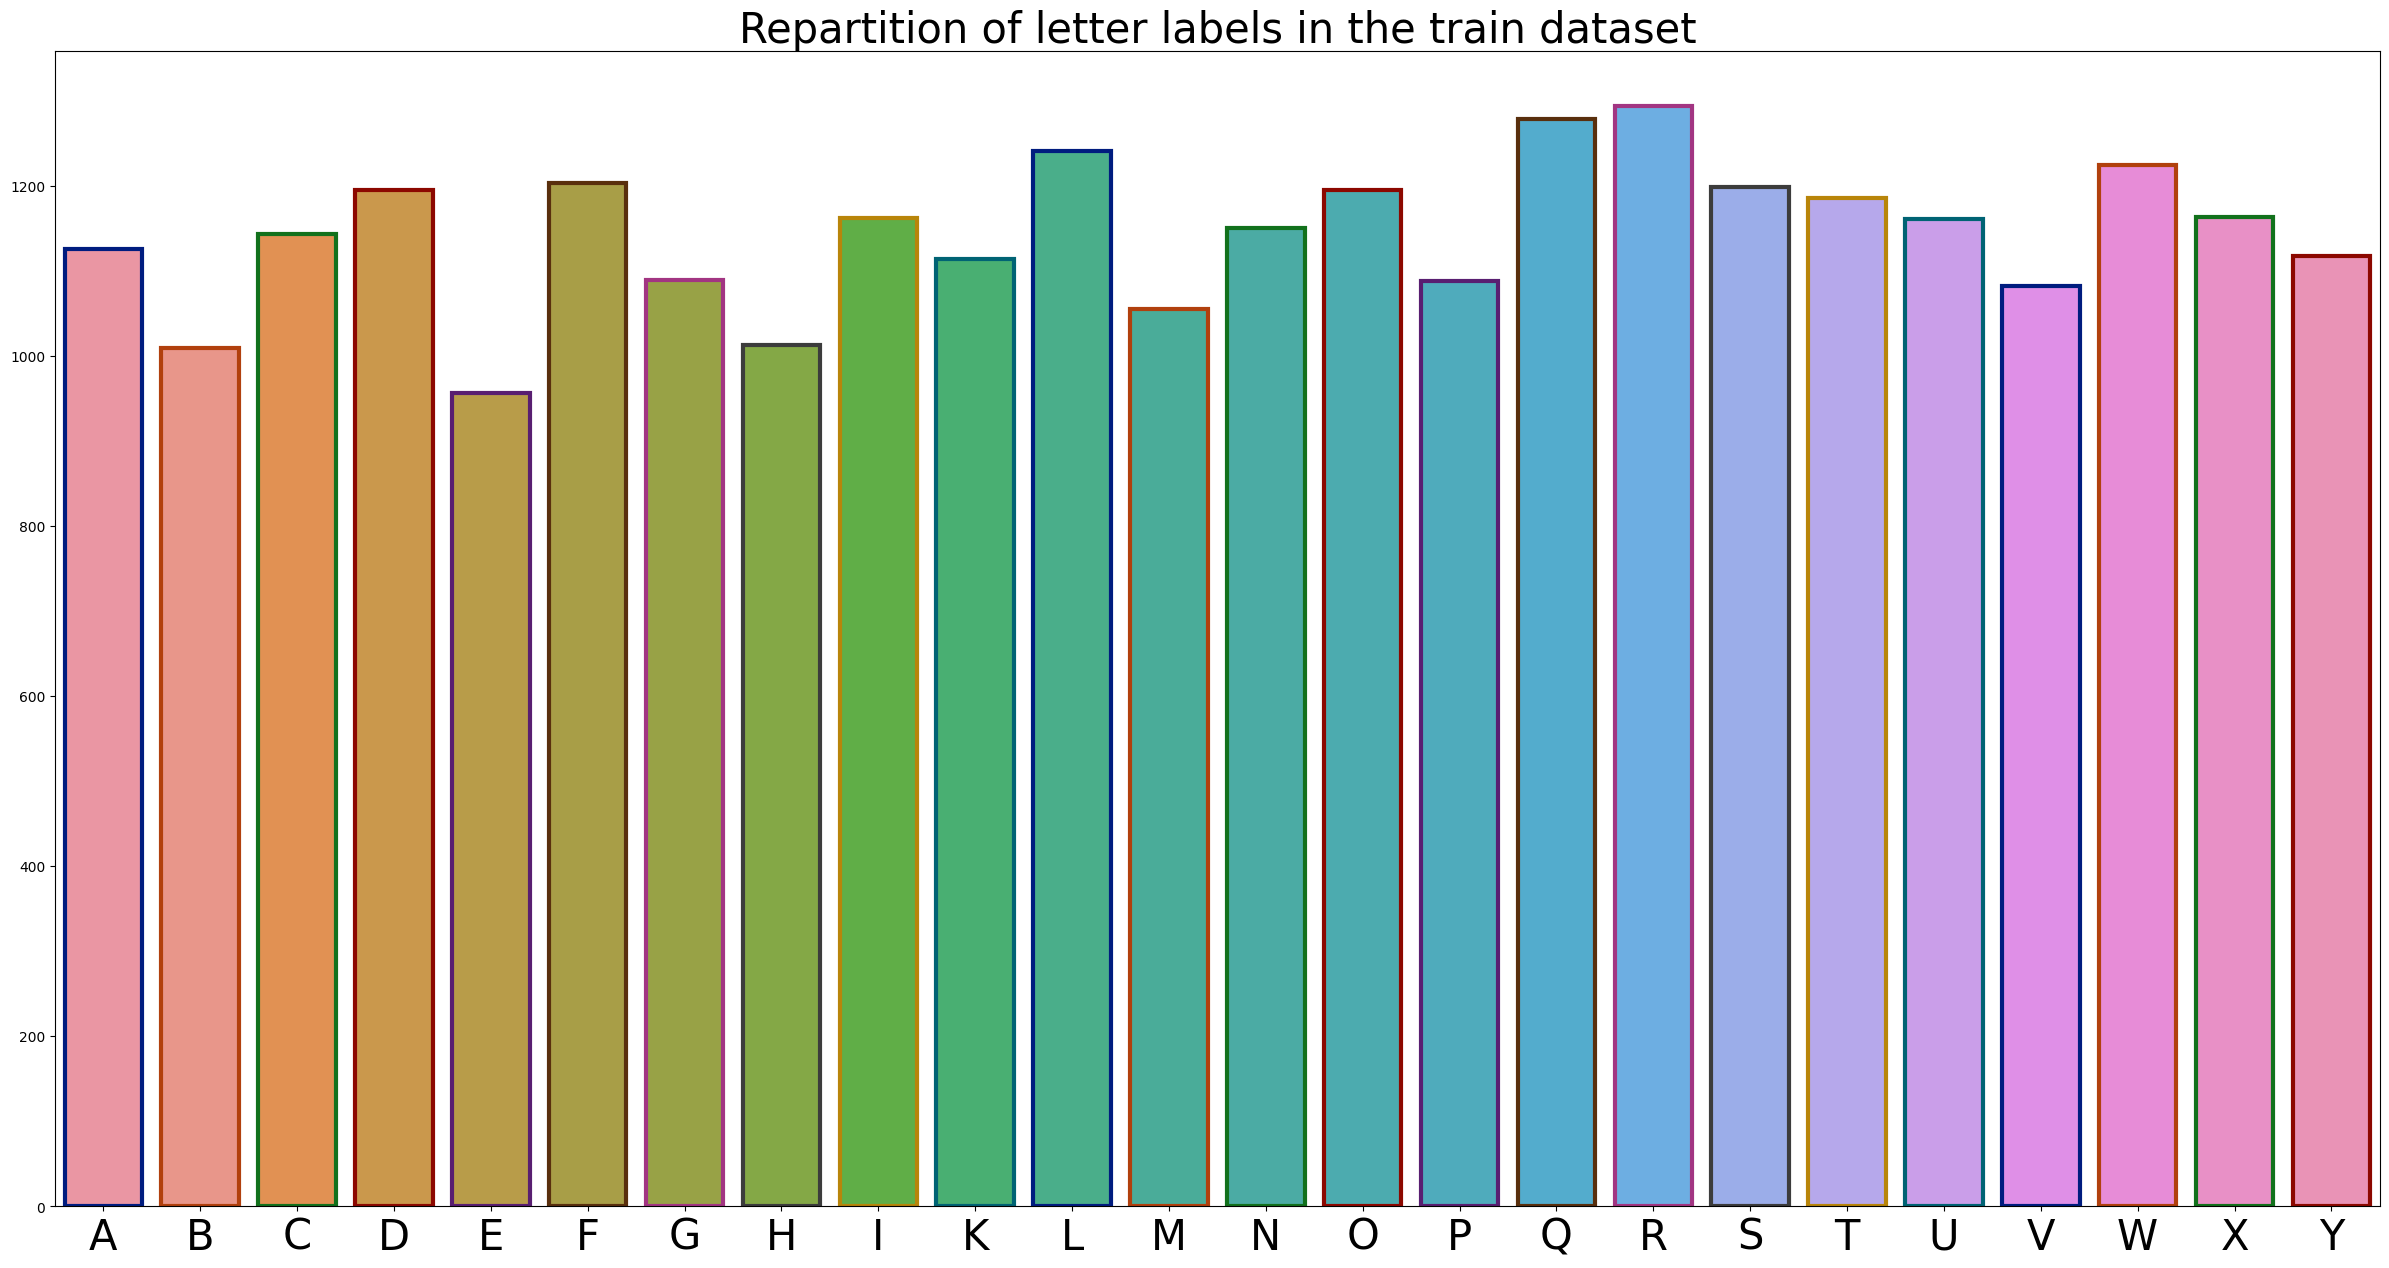

In [57]:
#is the train_dataset umbalanced ?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary mapping label to letter
num_letters = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F',
    6: 'G', 7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M',
    12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S',
    18: 'T', 19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'
}

# Count the occurrences of each letter label
letter_counts = pd.Series([letter_labels.value_counts()[letter] for letter in num_letters.values()], index=num_letters.values())

plt.figure(figsize=(30, 15))
plt.xticks(size=30)
sns.barplot(x=letter_counts.index, y=letter_counts.values, linewidth=3, edgecolor=sns.color_palette("dark"))
plt.title('Repartition of letter labels in the train dataset', fontdict={'color': 'black', 'fontsize': 30})
plt.show()


In [58]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode = 'nearest')


In [60]:
# Data prapration
X_test = X_test/255

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)



In [70]:
# reshaping
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [71]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# CNN Building
model = Sequential()

model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=24, activation='softmax'))


In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 256)       6656      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       819328    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)          204864    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)        

In [73]:
#Compil the model
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')


In [74]:
X_train.shape

(27455, 28, 28, 1)

In [75]:
#fit
model.fit(train_datagen.flow(X_train, y_train, batch_size=600), validation_data=(X_test, y_test), epochs=40)


Epoch 1/40
46/46 [==============================] - 29s 310ms/step - loss: 3.1768 - accuracy: 0.0476 - val_loss: 3.1896 - val_accuracy: 0.0229
Epoch 2/40
46/46 [==============================] - 12s 258ms/step - loss: 3.0814 - accuracy: 0.0791 - val_loss: 3.3169 - val_accuracy: 0.0229
Epoch 3/40
46/46 [==============================] - 12s 258ms/step - loss: 2.8499 - accuracy: 0.1284 - val_loss: 3.9910 - val_accuracy: 0.0484
Epoch 4/40
46/46 [==============================] - 11s 249ms/step - loss: 2.6272 - accuracy: 0.1709 - val_loss: 6.4336 - val_accuracy: 0.0229
Epoch 5/40
46/46 [==============================] - 11s 245ms/step - loss: 2.3536 - accuracy: 0.2341 - val_loss: 5.1873 - val_accuracy: 0.0484
Epoch 6/40
46/46 [==============================] - 12s 250ms/step - loss: 2.0777 - accuracy: 0.2997 - val_loss: 4.0476 - val_accuracy: 0.0484
Epoch 7/40
46/46 [==============================] - 12s 254ms/step - loss: 1.7632 - accuracy: 0.3945 - val_loss: 4.0203 - val_accuracy: 0.0229